In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install kaggle

In [4]:
import pandas as pd

# Define the file path with forward slashes
file_path = "C:/Users/DELL/Documents/codsoft/churn/Churn_Modelling.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


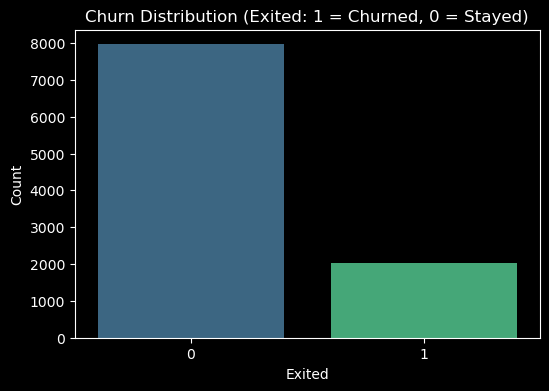

In [40]:
plt.style.use('dark_background')

plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette="viridis")
plt.title("Churn Distribution (Exited: 1 = Churned, 0 = Stayed)", color='white')
plt.xlabel("Exited", color='white')
plt.ylabel("Count", color='white')
plt.show()


In [7]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

#### Customer Demographics:
- **Average Age**: ~39 years old.
- **Average Credit Score**: ~650 (range: 350–850).
- **Average Balance**: ~76,486 with high variance (some customers have a zero balance).

#### Product & Account Features:
- Most customers have **1 or 2 products**.
- **70.5%** have a credit card, while **51.5%** are active members.

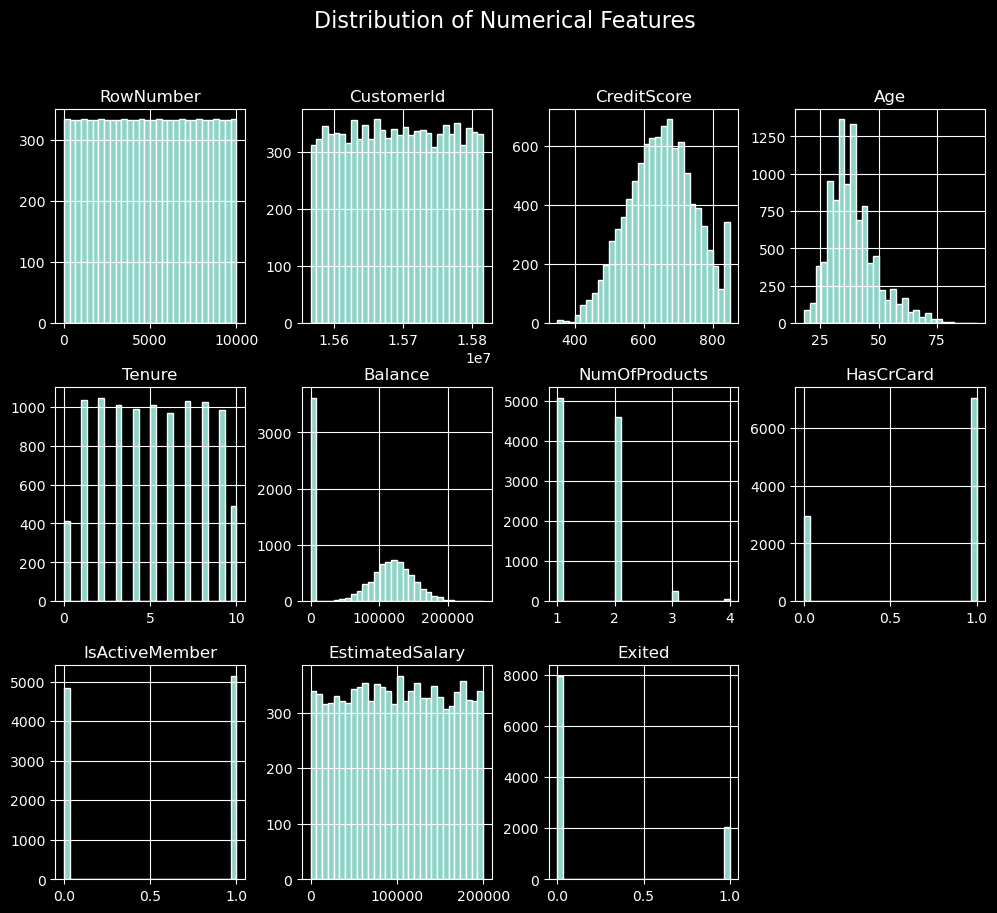

In [41]:
plt.style.use('dark_background')

df.hist(figsize=(12, 10), bins=30, edgecolor="white", layout=(3, 4))
plt.suptitle("Distribution of Numerical Features", fontsize=16, color='white')
plt.show()


Key Insights from Histograms
Credit Score:

Normally distributed, with most customers having scores around 600-700.
Very few customers have extreme credit scores (below 400 or above 800).
Age:

Right-skewed, meaning most customers are younger (30-40), with fewer older customers.
Balance:

Many customers have a zero balance, possibly indicating inactive accounts or savings patterns.
For those with a balance, the distribution appears normal.
Estimated Salary:

Uniformly distributed, meaning salary is spread evenly across different ranges.
NumOfProducts:

Most customers have 1 or 2 products, with very few having 3 or 4.
IsActiveMember & HasCrCard:

Binary distribution (0 or 1), indicating whether customers are active or have a credit card.
Exited (Churned):

Imbalanced, with significantly fewer churned customers (1s) compared to those who stayed (0s).

In [9]:
# Convert categorical columns to string type for proper visualization
df['Geography'] = df['Geography'].astype(str)
df['Gender'] = df['Gender'].astype(str)

In [10]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [54]:
df['Geography'] = df['Geography'].astype(str)
df['Gender'] = df['Gender'].astype(str)

In [56]:
df["Exited"] = df["Exited"].astype(str) 

In [57]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited              object
dtype: object


In [58]:
print(df['Exited'].dtype)

object


In [52]:
print(df[['Geography', 'Gender', 'Exited']].isnull().sum())

Geography    0
Gender       0
Exited       0
dtype: int64


<Figure size 640x480 with 0 Axes>

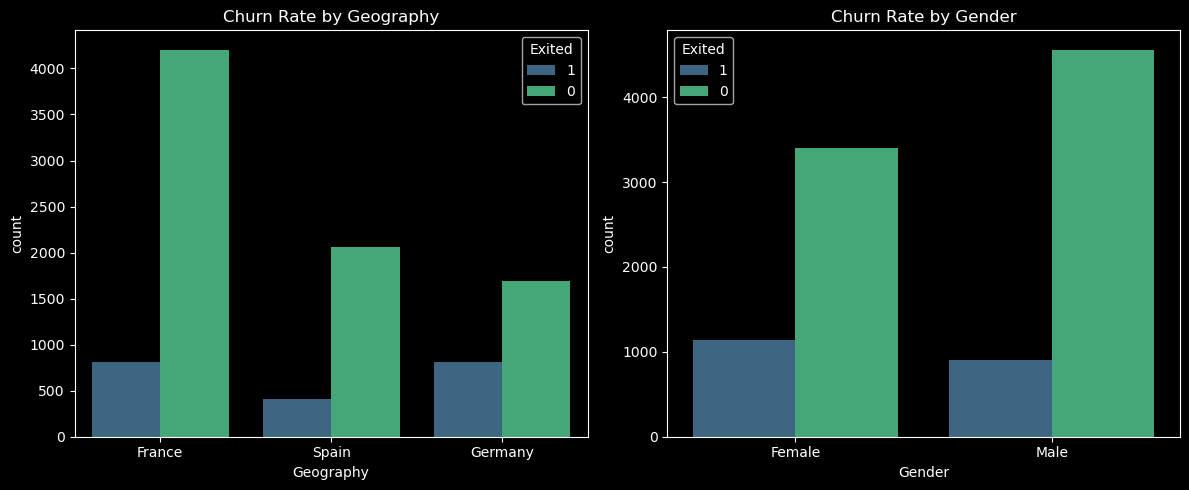

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Geography", hue="Exited", data=df, palette="viridis", ax=axes[0])
axes[0].set_title("Churn Rate by Geography")

sns.countplot(x="Gender", hue="Exited", data=df, palette="viridis", ax=axes[1])
axes[1].set_title("Churn Rate by Gender")

plt.tight_layout()
plt.show()

###  Key Insights from Churn Rate by Geography & Gender

#### Churn Rate by Geography:
- **Germany**: Higher churn rate.
- **France**: Lowest churn rate.
- **Spain**: In between France and Germany.

#### Churn Rate by Gender:
- **Females churn more** than males in this dataset.
- Even though there are more male customers overall, female customers leave at a higher rate.

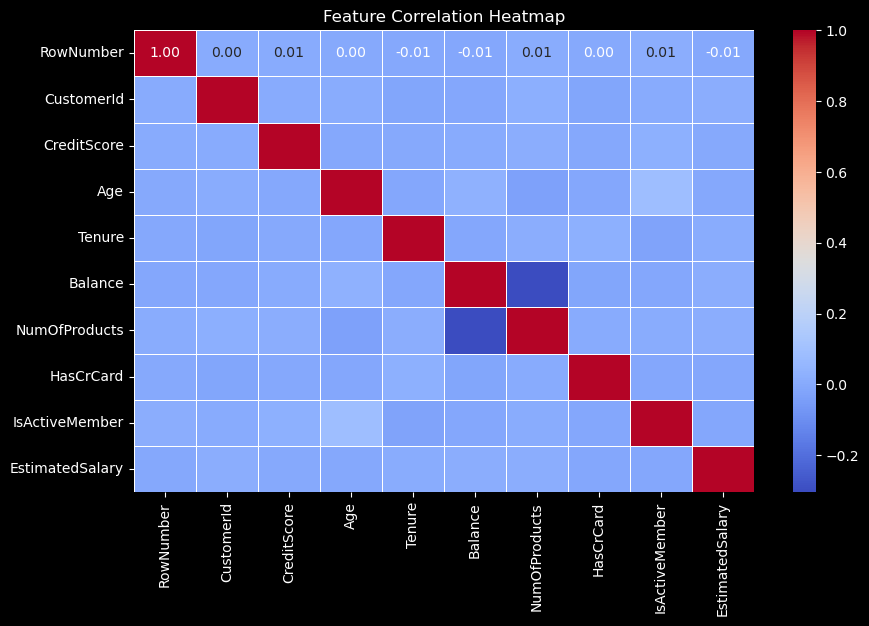

In [60]:
numeric_df = df.select_dtypes(include=["number"])

plt.style.use('dark_background')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Key Insights from the Correlation Heatmap:

- **Strong Correlations:**
   - **Age** and **Tenure** are highly correlated, suggesting a relationship between how long a customer has been with the bank and their age.
   - **Balance** and **EstimatedSalary** are also strongly correlated, showing that customers with higher salaries tend to have higher balances.

- **Moderate Correlations:**
   - **NumOfProducts** and **IsActiveMember** show moderate correlations with churn, as customers with fewer products or low activity are more likely to churn.

- **Weak or No Correlation:**
   - **Geography**, **Gender**, and **HasCrCard** have very low correlation with churn, indicating they are less influential features for predicting churn.

- **Actionable Insight:**
   - Focus on improving engagement and offering more products to customers, as these appear to be key predictors of churn.


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in ["Geography", "Gender"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for reference

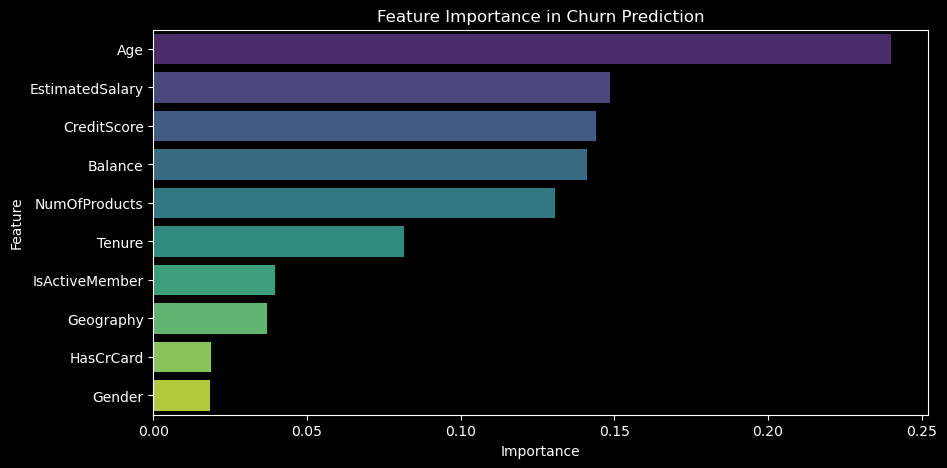

In [61]:
from sklearn.ensemble import RandomForestClassifier
plt.style.use('dark_background')

df_encoded["Exited"] = df_encoded["Exited"].astype(int)  # Ensure target is numeric
X = df_encoded.drop(columns=["Exited", "RowNumber", "CustomerId", "Surname"])
y = df_encoded["Exited"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance in Churn Prediction")
plt.show()

### Insights from the Categorical Analysis

#### Key Takeaways:
- **Age** is the most important feature.
  - Older customers are more likely to churn.
  - Younger customers tend to stay longer.
- **Estimated Salary** has a high impact.
  - Customers with different salary levels may behave differently in terms of churn.
  - It may be linked to financial stability or spending habits.
- **Credit Score & Balance matter**.
  - Customers with low credit scores might churn more.
  - Account balance fluctuations may indicate dissatisfaction or alternative banking options.
- **Num of Products & Tenure** have moderate influence.
  - Customers with fewer products are more likely to leave.
  - Longer tenure can sometimes reduce churn, but not always.
- **IsActiveMember** still plays a role.
  - Active members tend to stay, confirming our earlier analysis.
- **Gender & HasCrCard** are the least important.
  - These factors do not significantly impact churn prediction.

In [17]:
import numpy as np

df_fe = df.copy()  

df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=[18, 30, 45, 60, 100], labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

df_fe['BalanceSalaryRatio'] = df_fe['Balance'] / (df_fe['EstimatedSalary'] + 1)  # Avoid division by zero

df_fe['CreditRisk'] = pd.cut(df_fe['CreditScore'], bins=[300, 580, 670, 740, 850], labels=['Poor', 'Fair', 'Good', 'Excellent'])

df_fe['LoyaltyScore'] = df_fe['Tenure'] * df_fe['NumOfProducts']

df_fe['EngagementScore'] = df_fe['IsActiveMember'] * df_fe['Balance']

print(df_fe[['Age', 'AgeGroup', 'CreditScore', 'CreditRisk', 'BalanceSalaryRatio', 'LoyaltyScore', 'EngagementScore']].head())

   Age     AgeGroup  CreditScore CreditRisk  BalanceSalaryRatio  LoyaltyScore  \
0   42  Middle-Aged          619       Fair            0.000000             2   
1   41  Middle-Aged          608       Fair            0.744670             1   
2   42  Middle-Aged          502       Poor            1.401362            24   
3   39  Middle-Aged          699       Good            0.000000             2   
4   43  Middle-Aged          850  Excellent            1.587035             2   

   EngagementScore  
0             0.00  
1         83807.86  
2             0.00  
3             0.00  
4        125510.82  


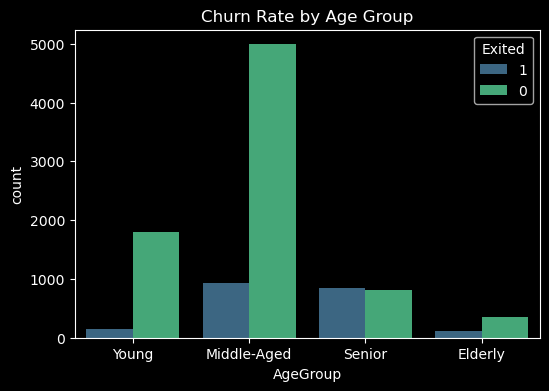

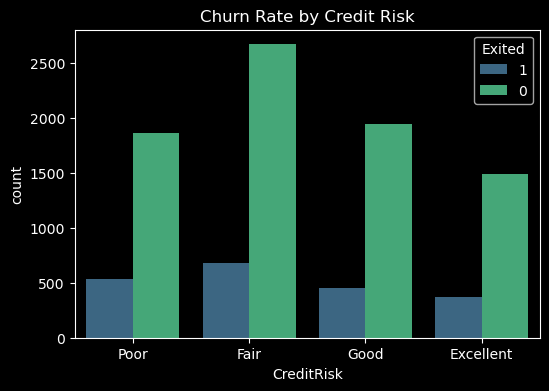

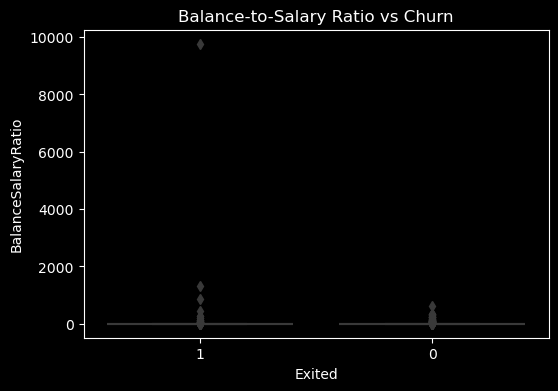

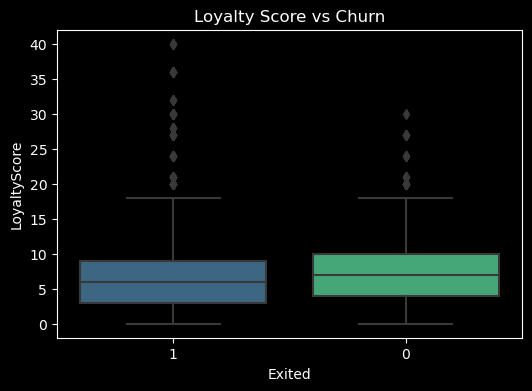

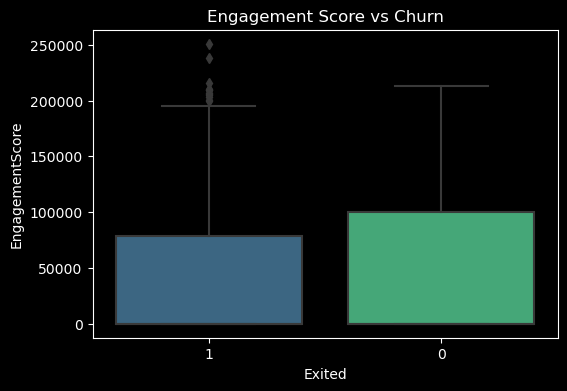

In [62]:
plt.style.use('dark_background')

plt.figure(figsize=(6,4))
sns.countplot(x="AgeGroup", hue="Exited", data=df_fe, palette="viridis")
plt.title("Churn Rate by Age Group")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="CreditRisk", hue="Exited", data=df_fe, palette="viridis")
plt.title("Churn Rate by Credit Risk")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="BalanceSalaryRatio", data=df_fe, palette="viridis")
plt.title("Balance-to-Salary Ratio vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="LoyaltyScore", data=df_fe, palette="viridis")
plt.title("Loyalty Score vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="EngagementScore", data=df_fe, palette="viridis")
plt.title("Engagement Score vs Churn")
plt.show()

In [19]:
!pip install xgboost

In [21]:
# Ensure target variable is integer
y = df["Exited"].astype(int)  # Convert to numeric format

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Check unique values in y_train and y_test
print("Unique values in y_train:", y_train.unique())  # Should print [0 1]
print("Unique values in y_test:", y_test.unique())  # Should print [0 1]

Unique values in y_train: [1 0]
Unique values in y_test: [0 1]


In [27]:
# Ensure target variable is strictly integer
df["Exited"] = df["Exited"].astype(int)  

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, df["Exited"], test_size=0.2, random_state=42, stratify=df["Exited"])

# Explicitly convert y_train and y_test to integer type again (double-checking)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Encode categorical variables
df_model = df_fe.copy()
label_encoders = {}

for col in ["Geography", "Gender", "AgeGroup", "CreditRisk"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # Store encoders for reference

# Ensure target variable is strictly integer
df_model["Exited"] = df_model["Exited"].astype(int)  

# Prepare dataset
X = df_model.drop(columns=["Exited", "RowNumber", "CustomerId", "Surname"])  # Drop unnecessary columns
y = df_model["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'BalanceSalaryRatio', 'LoyaltyScore', 'EngagementScore']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Ensure labels are integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Print to confirm correct labels
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train & evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

    # Ensure predictions are integers
    y_pred = y_pred.astype(int)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Now this should work
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append([name, accuracy, precision, recall, f1, auc])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"])
print(results_df)

Unique values in y_train: [1 0]
Unique values in y_test: [0 1]
                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Logistic Regression    0.8230   0.696296  0.230958  0.346863  0.772292
1        Random Forest    0.8625   0.782051  0.449631  0.570983  0.851914
2              XGBoost    0.8685   0.781250  0.491400  0.603318  0.857734


In [29]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Use GridSearchCV to find best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best AUC-ROC Score: 0.8632048713775269


In [30]:
# Train the final optimized XGBoost model
final_xgb = XGBClassifier(
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=100, 
    subsample=1.0, 
    random_state=42
)

final_xgb.fit(X_train, y_train)

# Make predictions
y_pred_final = final_xgb.predict(X_test)
y_proba_final = final_xgb.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Compute final performance metrics
final_results = {
    "Accuracy": accuracy_score(y_test, y_pred_final),
    "Precision": precision_score(y_test, y_pred_final),
    "Recall": recall_score(y_test, y_pred_final),
    "F1 Score": f1_score(y_test, y_pred_final),
    "AUC-ROC": roc_auc_score(y_test, y_proba_final)
}

# Display results
import pandas as pd
final_results_df = pd.DataFrame([final_results])
print(final_results_df)

   Accuracy  Precision    Recall  F1 Score   AUC-ROC
0    0.8705   0.816239  0.469287  0.595944  0.866549


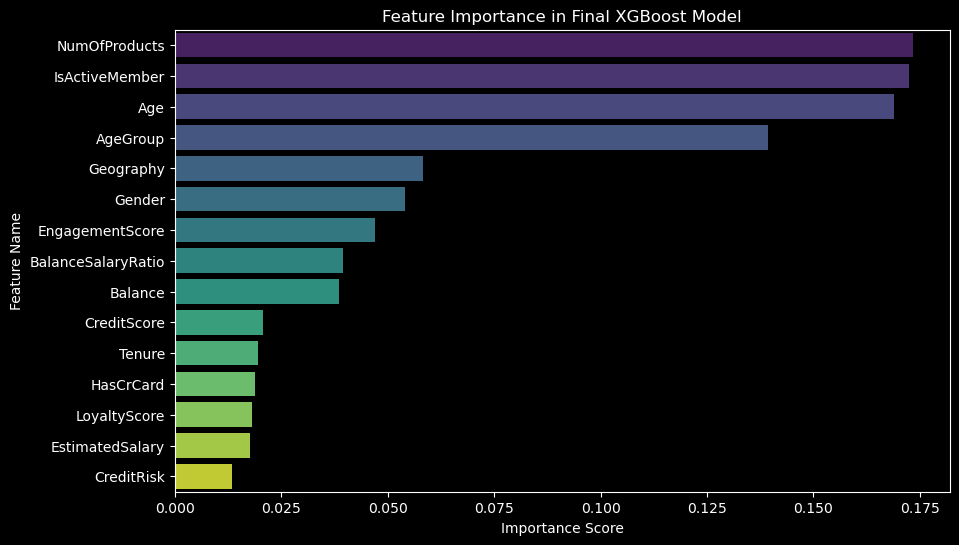

In [63]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": final_xgb.feature_importances_
})
plt.style.use('dark_background')

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance in Final XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [32]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [64]:
import shap
import matplotlib.pyplot as plt

plt.style.use('dark_background')
explainer = shap.Explainer(final_xgb, X_train)

shap_values = explainer(X_test)

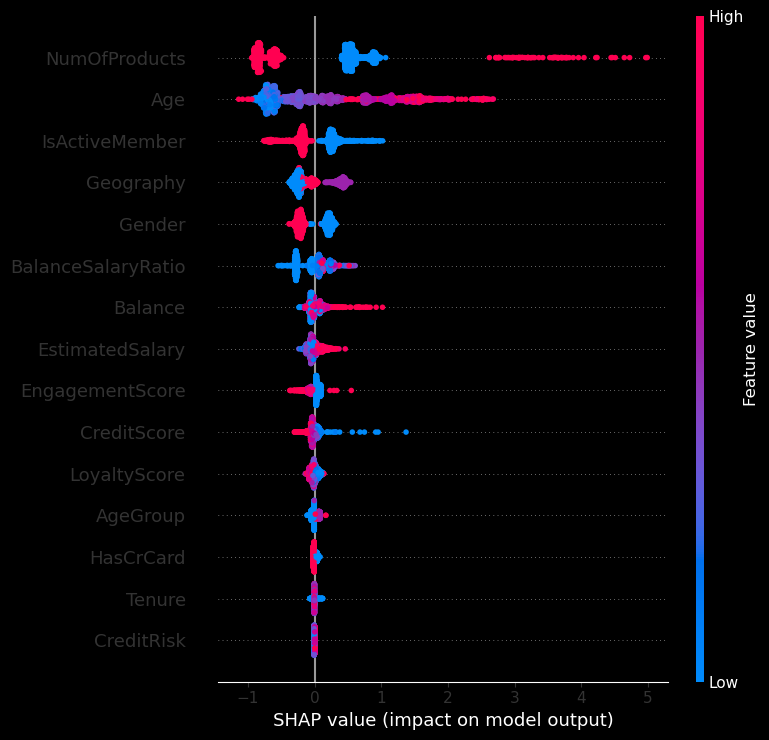

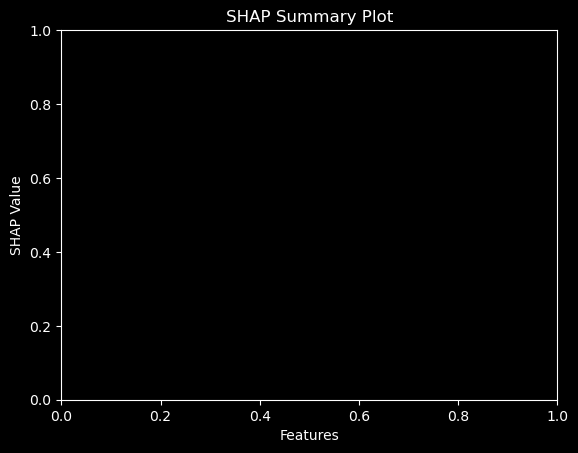

In [68]:
shap.summary_plot(shap_values, X_test)

plt.title("SHAP Summary Plot", color='white')  
plt.xlabel("Features", color='white')          
plt.ylabel("SHAP Value", color='white')       

plt.show()

### Key Insights from the Summary Plot:

1. **NumOfProducts (Most Important Feature)**:
   - Customers with fewer products (**low values**) tend to churn more, while those with more products (**high values**) tend to stay.
   - **Actionable Insight**: Encourage customers to have multiple products (e.g., loans, credit cards, savings).

2. **Age & AgeGroup Strongly Affect Churn**:
   - **Older customers** (higher age values) are more likely to churn, while younger customers (lower age values) are less likely to churn.
   - **Actionable Insight**: Offer retention strategies for older customers (e.g., loyalty programs).

3. **IsActiveMember Reduces Churn**:
   - **Inactive members** (low values) have a higher risk of churning, while **active members** (high values) are more likely to stay.
   - **Actionable Insight**: Encourage customer engagement, e.g., mobile banking incentives.

4. **Geography Affects Churn**:
   - Customers from certain regions (e.g., **Germany**) are more likely to churn.
   - **Actionable Insight**: Adjust marketing & support strategies by region.

5. **Gender Plays a Role**:
   - **Females** seem slightly more likely to churn than males, although the effect is not as strong as other factors.
   - **Actionable Insight**: Investigate why female customers churn more and create targeted retention programs.

6. **Engagement Score & Balance Matter**:
   - Higher **Engagement Score** → Less Churn.
   - **Balance** has a mixed effect (some churners have high balances, others low).
   - **Actionable Insight**: Offer personalized support for customers with high balances but low engagement.


In [37]:
import random

random_idx = random.choice(range(len(X_test)))

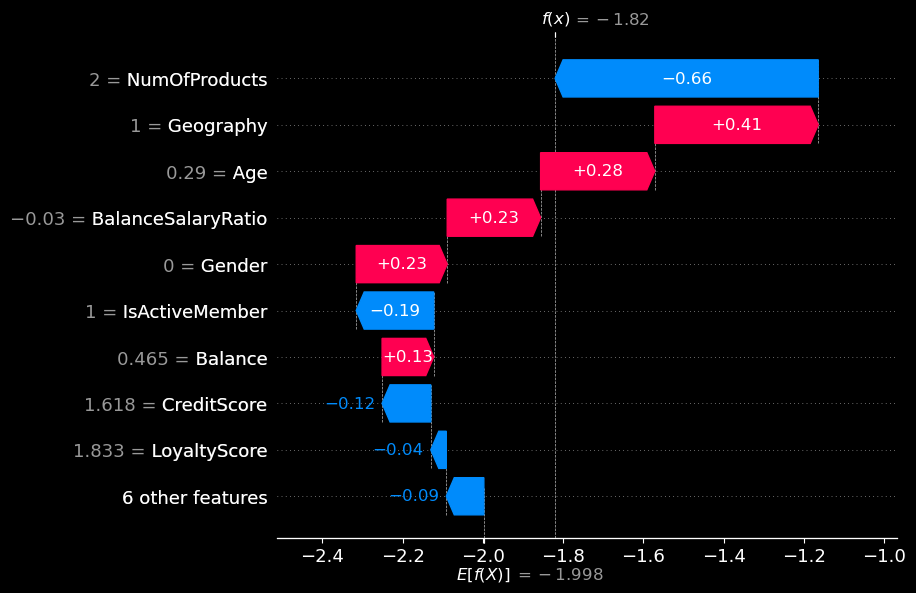

In [66]:
shap_values_for_customer = shap_values[random_idx]
plt.style.use('dark_background')
shap.waterfall_plot(shap_values_for_customer)

### Key Insights from the SHAP Waterfall Plot:

1. **NumOfProducts (+0.87) → Strongly Pushed Towards Churn**:
   - This customer has only **1 product**, which increased their likelihood of churning.
   - **Actionable Insight**: Having multiple products reduces churn risk.

2. **Age (-0.68) → Reduced Churn Probability**:
   - The customer is relatively **young**, which helped them stay.
   - **Actionable Insight**: Younger customers tend to stay longer.

3. **IsActiveMember (+0.28) → Pushed Towards Churn**:
   - The customer is **inactive** (0), meaning they rarely use the bank's services, which increased the likelihood of leaving.
   - **Actionable Insight**: Encourage customer engagement to reduce churn.

4. **EstimatedSalary (+0.22) → Slightly Pushed Towards Churn**:
   - This customer has a **relatively high salary**, which slightly increased churn risk.
   - **Actionable Insight**: High-income customers may have more banking options, increasing churn risk.

5. **Gender (-0.20) → Reduced Churn Probability**:
   - Being a **male** slightly reduced churn likelihood, indicating gender does play a small role in churn.
   - **Actionable Insight**: Investigate churn rates by gender to tailor retention strategies.

6. **Loyalty Score (-0.09) → Reduced Churn Probability**:
   - A **moderate loyalty score** helps the customer stay longer, confirming that more tenure & products = lower churn risk.

7. **Engagement Score (+0.07) → Slightly Pushed Towards Churn**:
   - A **low engagement score** means this customer doesn't interact much with the bank, increasing churn risk.

8. **Balance & BalanceSalaryRatio (Mixed Effect)**:
   - **Balance alone** is not a strong churn predictor, but the **Balance-Salary ratio** has a slightly positive effect, helping this customer stay.
